# Deep Deterministic Policy Gradients (DDPG)
---
In this notebook, we train DDPG with OpenAI Gym's BipedalWalker-v2 environment.

### 1. Import the Necessary Packages

In [1]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

# imports for rendering outputs in Jupyter.
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display

### 2. Instantiate the Environment and Agent

In [2]:
env = gym.make('BipedalWalker-v2')
env.seed(10)
agent = Agent(state_size=env.observation_space.shape[0], action_size=env.action_space.shape[0], random_seed=10)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [3]:
print ("action space: {} ... state space: {}".format(env.action_space,env.observation_space))

action space: Box(4,) ... state space: Box(24,)


In [4]:
env.action_space.high, env.action_space.low

(array([1., 1., 1., 1.], dtype=float32),
 array([-1., -1., -1., -1.], dtype=float32))

In [5]:
# lets play a random episode

state = env.reset()
done = False
step = 0
while (not done):
    action = env.action_space.sample()
    next_state,reward,done,_= env.step(action)
    
    print ("step: {} ... state: {} ... action: {} ... reward: {:.2f} ... done: {}\n".format(step,state[:4],
                                                                                      action,reward,done))  
    state = next_state
    step+=1

step: 0 ... state: [ 2.74737482e-03 -1.79915968e-05  1.39956169e-03 -1.59998775e-02] ... action: [0.09762701 0.43037874 0.20552675 0.08976637] ... reward: -0.02 ... done: False

step: 1 ... state: [ 0.00245546 -0.00693401  0.00706781  0.01954999] ... action: [-0.1526904   0.29178822 -0.12482557  0.78354603] ... reward: -0.04 ... done: False

step: 2 ... state: [0.0025492  0.00254582 0.00921938 0.0067264 ] ... action: [ 0.92732555 -0.23311697  0.5834501   0.05778984] ... reward: -0.18 ... done: False

step: 3 ... state: [-0.02497778 -0.05565673 -0.03224418 -0.01146388] ... action: [ 0.13608912  0.85119325 -0.85792786 -0.8257414 ] ... reward: -0.15 ... done: False

step: 4 ... state: [-0.03810721 -0.02684057 -0.01018923 -0.00028272] ... action: [-0.9595632   0.6652397   0.5563135   0.74002427] ... reward: -0.08 ... done: False

step: 5 ... state: [-0.04034055 -0.00448921  0.02451716  0.07418973] ... action: [ 0.9572367   0.59831715 -0.07704128  0.56105834] ... reward: -0.13 ... done: Fal

### 3. Train the Agent with DDPG

Run the code cell below to train the agent from scratch.  Alternatively, you can skip to the next code cell to load the pre-trained weights from file.

In [ ]:
n_episodes=2000
max_t=700
scores_deque = deque(maxlen=100)
scores = []
max_score = -np.Inf
for i_episode in range(1, n_episodes+1):
    state = env.reset()
    agent.reset()
    score = 0
    for t in range(max_t):
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        agent.step(state, action, reward, next_state, done)
        state = next_state
        score += reward
        if done:
            break 
    scores_deque.append(score)
    scores.append(score)
    if max_score<score:
        max_score=score
    #print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), score), end="")
    if i_episode % 50 == 0:
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        print('Episode {} ... Average reward: {:.2f} ... Max reward: {:.2f}'.format(i_episode,
                                                                                      np.mean(scores_deque),max_score))

/home/parminder0407/anaconda3/envs/cv3/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 50 ... Average reward: -99.30 ... Max reward: -32.41
Episode 100 ... Average reward: -107.65 ... Max reward: -32.41
Episode 150 ... Average reward: -109.62 ... Max reward: -32.41
Episode 200 ... Average reward: -108.82 ... Max reward: -32.41
Episode 250 ... Average reward: -107.55 ... Max reward: -30.48
Episode 300 ... Average reward: -93.57 ... Max reward: -25.35
Episode 350 ... Average reward: -82.82 ... Max reward: -24.29
Episode 400 ... Average reward: -92.95 ... Max reward: -24.29
Episode 450 ... Average reward: -95.83 ... Max reward: -24.29
Episode 500 ... Average reward: -63.47 ... Max reward: -24.29
Episode 550 ... Average reward: -76.84 ... Max reward: -24.29
Episode 600 ... Average reward: -111.90 ... Max reward: -24.29
Episode 650 ... Average reward: -109.11 ... Max reward: -24.29


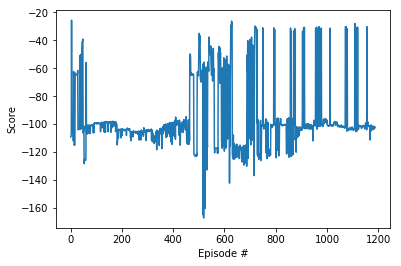

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. Watch a Smart Agent!

In the next code cell, you will load the trained weights from file to watch a smart agent!

In [6]:
# function to animate a list of frames
def animate_frames(frames):
    plt.figure(dpi = 72)
    plt.axis('off')

    # color option for plotting
    # use Greys for greyscale
    cmap = None if len(frames[0].shape)==3 else 'Greys'
    patch = plt.imshow(frames[0], cmap=cmap)  

    fanim = animation.FuncAnimation(plt.gcf(), \
        lambda x: patch.set_data(frames[x]), frames = len(frames), interval=30)
    
    display(display_animation(fanim, default_mode='once'))

In [ ]:
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth',map_location='cpu'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth',map_location='cpu'))

frames = []
state = env.reset()
agent.reset()
for t in range(1000):
    action = agent.act(state)
    frames.append(env.render(mode='rgb_array')) 
    next_state, reward, done, _ = env.step(action)
    state=next_state
    if done:
        break

env.close()
animate_frames(frames)

RecursionError: maximum recursion depth exceeded